## Librerias

In [1]:
##### Tratamiento de Datos ####
# ==============================================================================

import pandas as pd
import numpy as np


##### Graficos ####
# ==============================================================================

%matplotlib inline
import matplotlib.pyplot as plt
import pylab


# Preprocesado y modelado
# ==============================================================================

import scipy.stats as stats

In [2]:
#### Carga de datos en un DataFrame ###
df= pd.read_csv("datasets/Regresion.csv")
df

,Salario,Educacion,Experiencia,Permanencia
0,3.10,11,2,0
1,3.24,12,22,2
2,3.00,11,2,0
3,6.00,8,44,28
4,5.30,12,7,2
...,...,...,...,...
242,3.06,12,14,10
243,3.20,12,15,5
244,4.75,12,19,0
245,3.00,14,17,0


## Analisis Exploratorio

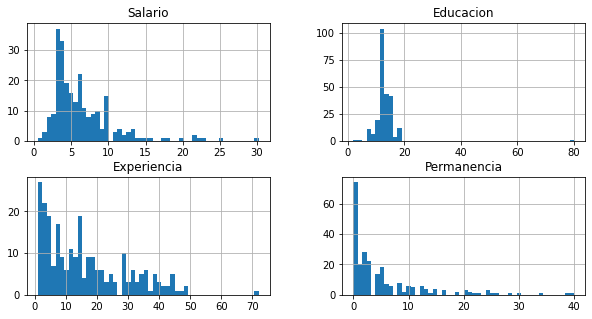

In [3]:
df.hist(bins=50, figsize=(10,5))
plt.show()

In [4]:
# Se obtendrá la estadistica descriptiva de los datos
df.describe()

,Salario,Educacion,Experiencia,Permanencia
count,247.000000,247.000000,247.000000,247.000000
mean,6.416275,13.109312,16.133603,5.238866
std,4.309705,4.951820,13.250340,7.230499
min,0.530000,2.000000,1.000000,0.000000
25%,3.500000,12.000000,5.000000,0.000000
50%,5.000000,12.000000,13.000000,3.000000
75%,8.000000,14.000000,24.500000,7.000000
max,30.200000,80.000000,72.000000,40.000000


In [5]:
### Busqueda de Outliers ###

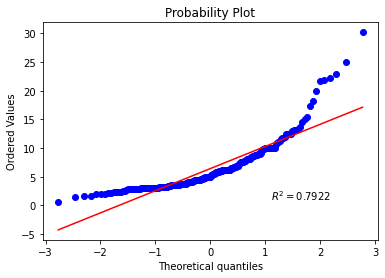

In [6]:
stats.probplot(df['Salario'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

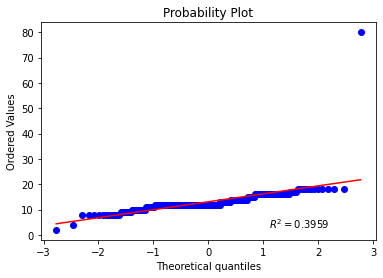

In [7]:
stats.probplot(df['Educacion'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

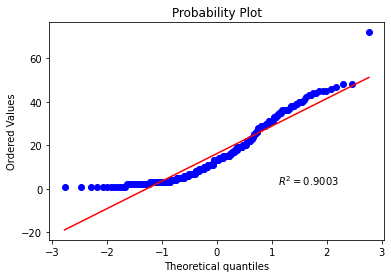

In [8]:
stats.probplot(df['Experiencia'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

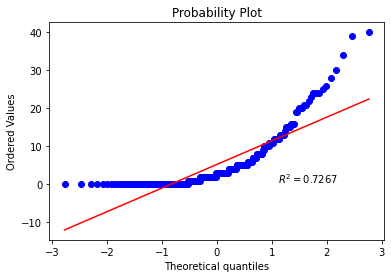

In [9]:
stats.probplot(df['Permanencia'],dist = "norm",plot=pylab, rvalue = True)
pylab.show()

# Limpieza datos

In [10]:
df=df[df["Experiencia"]<72]

In [11]:
df.describe()

,Salario,Educacion,Experiencia,Permanencia
count,246.000000,246.000000,246.000000,246.000000
mean,6.426098,13.113821,15.906504,5.211382
std,4.315720,4.961407,12.786608,7.232299
min,0.530000,2.000000,1.000000,0.000000
25%,3.500000,12.000000,5.000000,0.000000
50%,5.065000,12.000000,13.000000,3.000000
75%,8.000000,14.000000,24.000000,7.000000
max,30.200000,80.000000,48.000000,40.000000


In [12]:
list(df)

['Salario', 'Educacion', 'Experiencia', 'Permanencia']

In [14]:
df=df[df['Educacion']<80]

In [15]:
df.describe()

,Salario,Educacion,Experiencia,Permanencia
count,245.000000,245.000000,245.000000,245.000000
mean,6.442939,12.840816,15.889796,5.175510
std,4.316447,2.511279,12.810092,7.225142
min,0.530000,2.000000,1.000000,0.000000
25%,3.500000,12.000000,5.000000,0.000000
50%,5.130000,12.000000,13.000000,3.000000
75%,8.000000,14.000000,24.000000,7.000000
max,30.200000,18.000000,48.000000,40.000000


In [16]:
df['x']=np.arange(len(df))

C:\Users\Arancium\AppData\Local\Temp\ipykernel_7796\123469907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x']=np.arange(len(df))


### Tipos de Graficos

<AxesSubplot:xlabel='x', ylabel='Salario'>

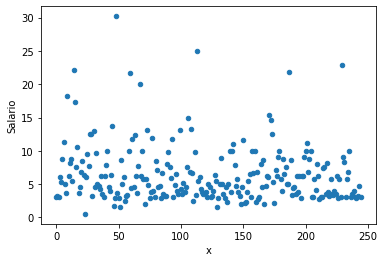

In [17]:
df.plot.scatter(x='x',y= 'Salario')

<AxesSubplot:ylabel='Frequency'>

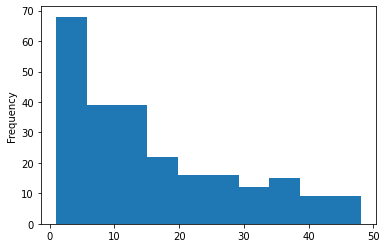

In [18]:
df['Experiencia'].plot.hist()

In [19]:
df['Experiencia'].describe()

count    245.000000
mean      15.889796
std       12.810092
min        1.000000
25%        5.000000
50%       13.000000
75%       24.000000
max       48.000000
Name: Experiencia, dtype: float64

# Operaciones con columnas

In [20]:
#Agregar Columna de Expertiz 

def expertiz(fila):
    return fila['Permanencia']/fila['Experiencia']
df['expertiz']=df.apply(expertiz, axis=1)

C:\Users\Arancium\AppData\Local\Temp\ipykernel_7796\2300959450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expertiz']=df.apply(expertiz, axis=1)


In [21]:
df

,Salario,Educacion,Experiencia,Permanencia,x,expertiz
0,3.10,11,2,0,0,0.000000
1,3.24,12,22,2,1,0.090909
2,3.00,11,2,0,2,0.000000
3,6.00,8,44,28,3,0.636364
4,5.30,12,7,2,4,0.285714
...,...,...,...,...,...,...
241,2.92,12,4,0,240,0.000000
242,3.06,12,14,10,241,0.714286
243,3.20,12,15,5,242,0.333333
244,4.75,12,19,0,243,0.000000
